In [1]:
# Load libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [10]:
data = pd.read_csv("/Users/punitshah/Downloads/diabetes.csv")

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

In [13]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [14]:
data.columns = col_names

In [15]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
#split dataset in features and target variable

X = data.drop(columns = 'label') # Features
y = data['label'] # Target variable

In [18]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
X_train.shape

(537, 8)

In [20]:
X_test.shape

(231, 8)

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [22]:
clf

DecisionTreeClassifier()

In [23]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [24]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


In [26]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       156
           1       0.52      0.59      0.55        75

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.66       231
weighted avg       0.70      0.69      0.69       231



In [27]:
print(clf)

DecisionTreeClassifier()


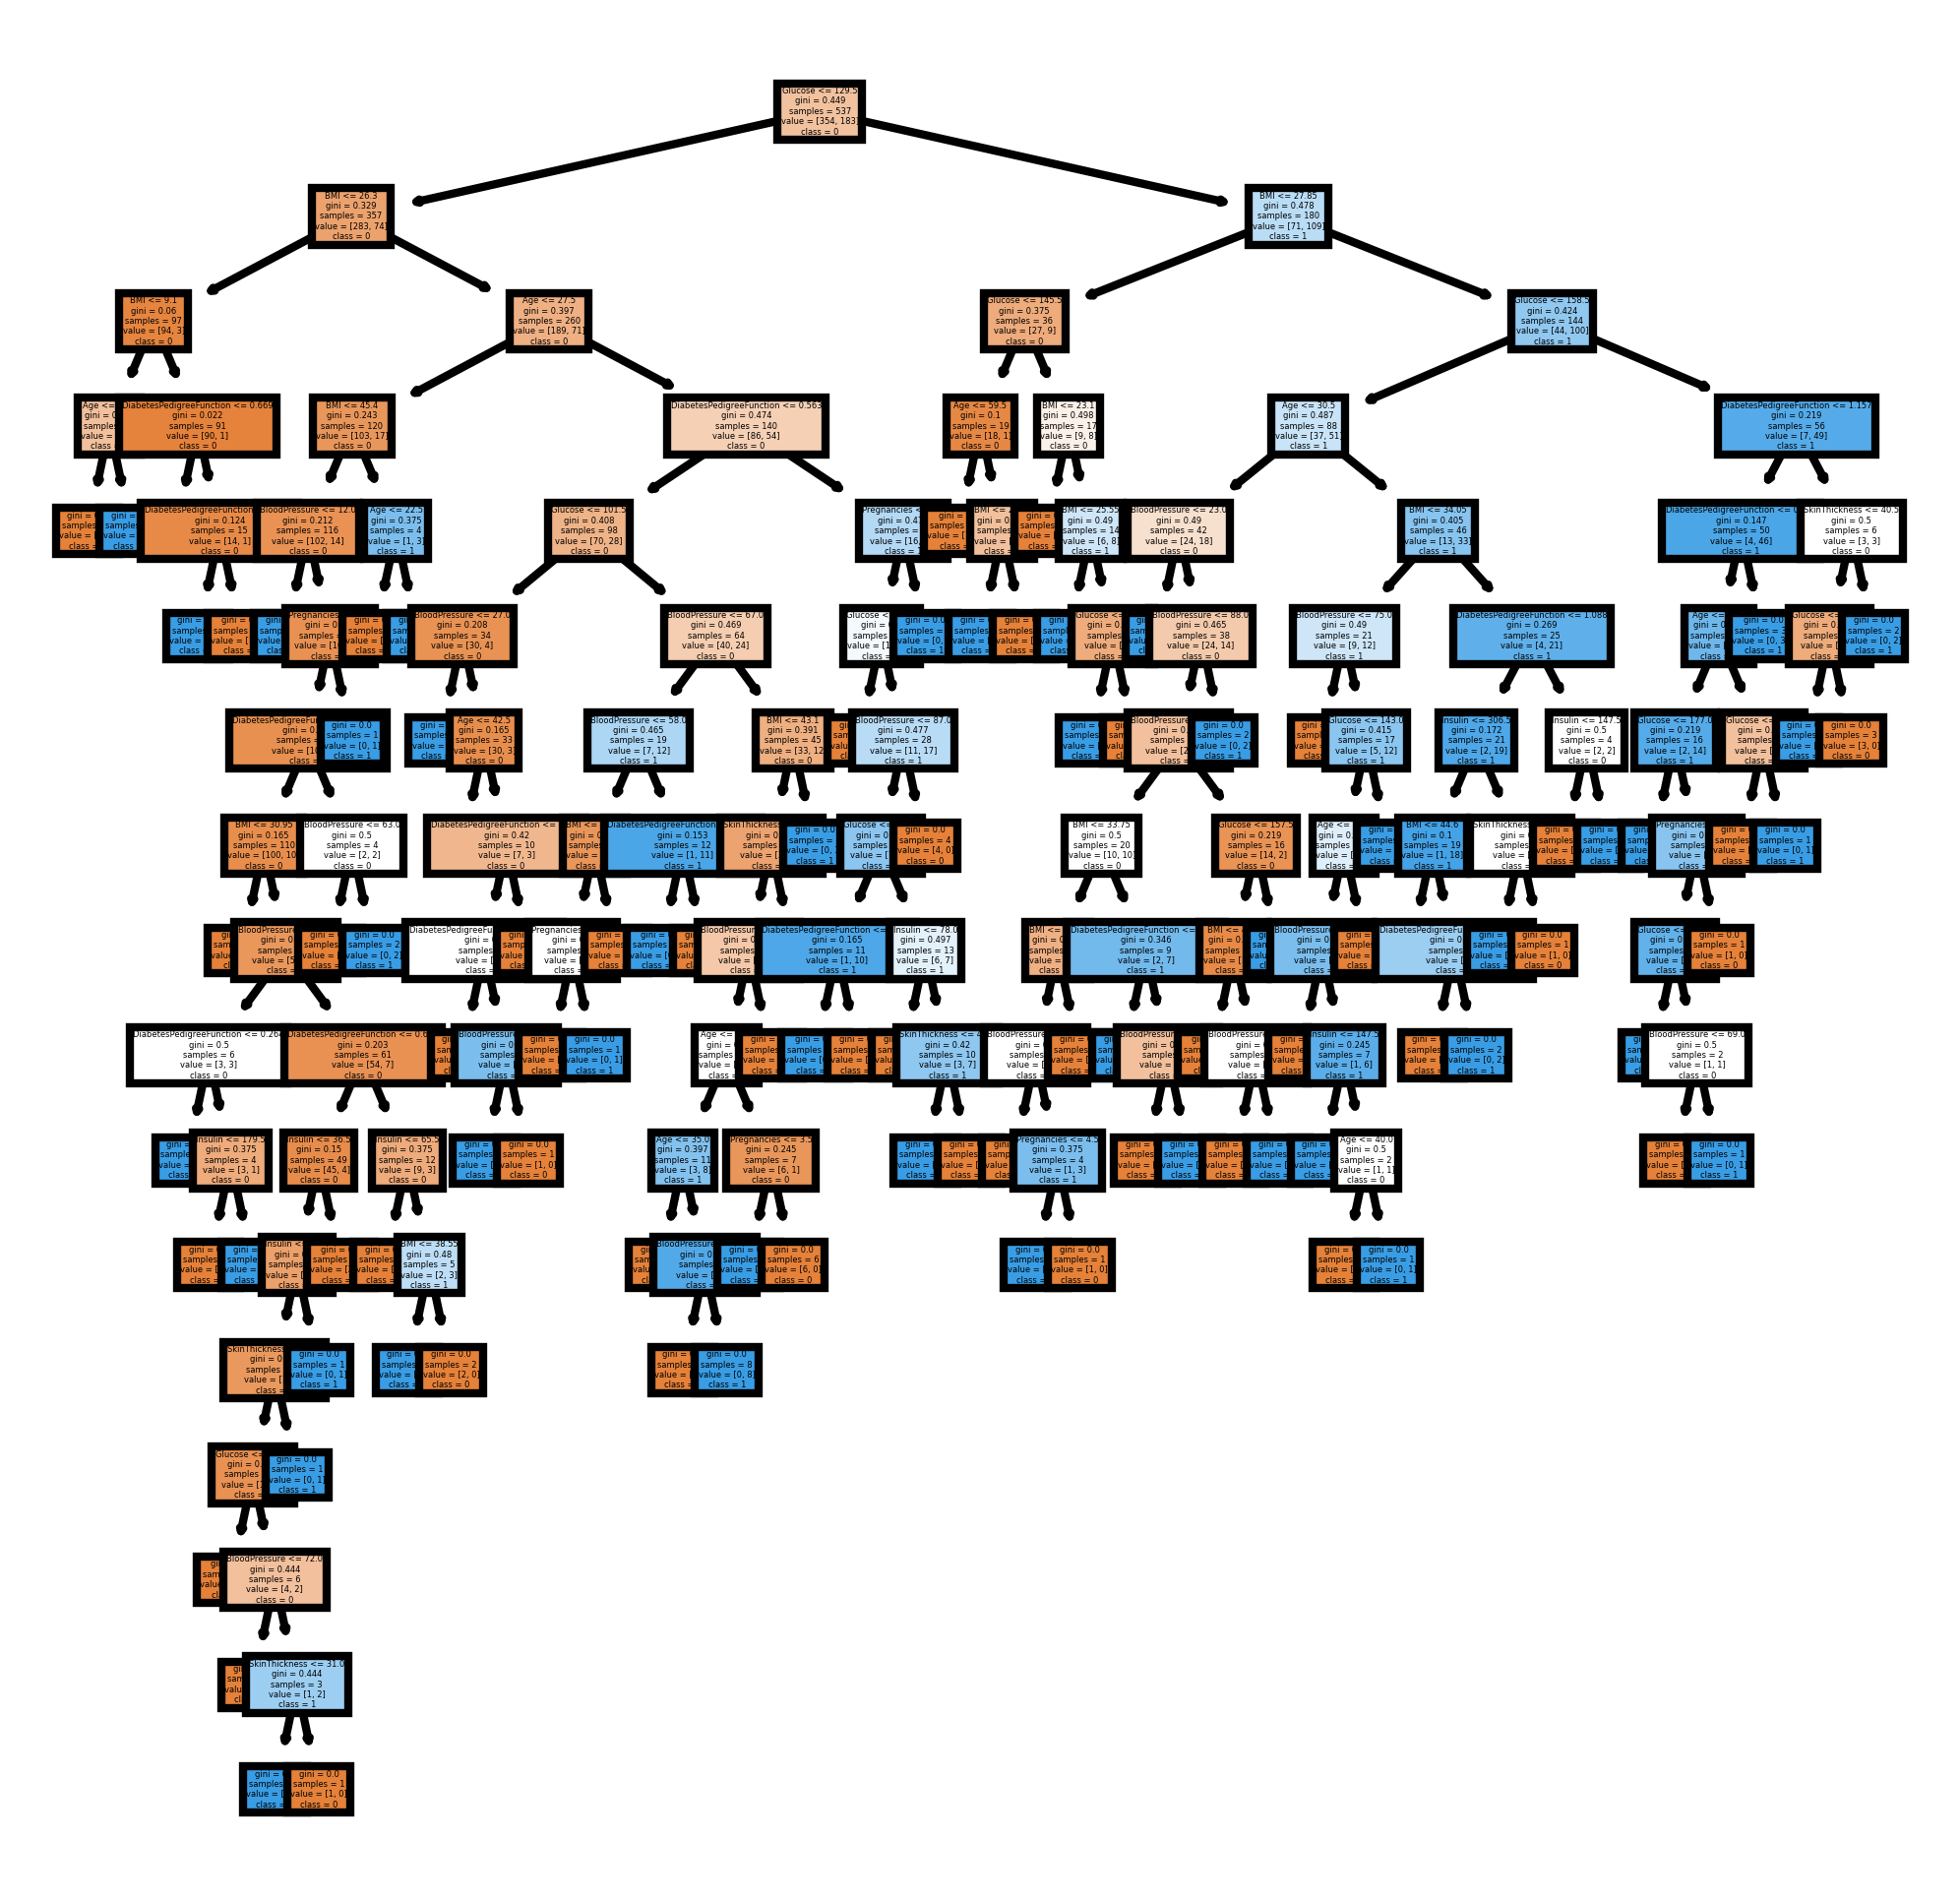

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=['0','1'],
               filled = True);

fig.savefig('imagename.png')

# Tree Optimization 

In [ ]:
parameterstree = DecisionTreeClassifier(criterion = "entropy", 
                                        splitter = "random", 
                                        max_depth = 2,  
                                        min_samples_split = 5,
                                        min_samples_leaf = 5, 
                                        max_features = 5,
                                       random_state=206)

In [ ]:
parameterstree.fit(X_train,y_train)

In [ ]:
y_pred_param = parameterstree.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

In [ ]:
print(metrics.classification_report(y_pred_param,y_test))

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(parameterstree,
               feature_names = feature_cols, 
               class_names=['0','1'],
               filled = True);